##### Processing and Analysis of BRCA RNA-seq Data for Molecular Subtyping

In [1]:
#import libaries
import pandas as pd
import numpy as np
import glob
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA   
import matplotlib.pyplot as plt
import seaborn as sns   

print("Libraries imported successfully.")

Libraries imported successfully.


In [2]:
%run "C:\Projects\BRCA_ML_Project\src\sequence_data.py"
df_rnaseq =load_tpm()

Loading TPM gene expression file...


In [3]:
df_rnaseq.head()

,TCGA-D8-A146-01A,TCGA-AQ-A0Y5-01A,TCGA-C8-A274-01A,TCGA-BH-A0BD-01A,TCGA-B6-A1KC-01B,TCGA-AC-A62V-01A,TCGA-AO-A0J5-01A,TCGA-BH-A0B1-01A,TCGA-A2-A0YM-01A,TCGA-AO-A03N-01B,...,TCGA-E2-A1IG-01A,TCGA-E9-A1NA-01A,TCGA-D8-A1JP-01A,TCGA-AR-A252-01A,TCGA-D8-A1XL-01A,TCGA-BH-A0EI-01A,TCGA-E2-A1IO-01A,TCGA-E2-A15R-01A,TCGA-B6-A0IP-01A,TCGA-A1-A0SN-01A
Ensembl_ID,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.15,5.662037,3.703721,6.514515,4.784917,4.251984,3.536849,4.645690,6.021755,6.260931,3.613025,...,4.825501,4.142806,4.960919,4.770121,5.276757,6.436490,6.184500,2.670931,6.834395,3.650719
ENSG00000000005.6,3.376096,0.463099,0.000000,2.328061,0.435415,0.736475,1.255622,0.392647,0.467593,0.000000,...,0.134747,0.159500,0.079566,3.312418,0.000000,0.383608,0.755144,0.479644,0.526069,0.059909
ENSG00000000419.13,6.860140,7.086452,6.805072,6.443071,6.178436,6.823355,5.749910,6.977449,6.819887,6.079559,...,6.382933,6.436308,6.994589,6.005000,7.382161,7.220846,6.868277,7.033110,6.384368,8.153019
ENSG00000000457.14,4.400552,4.051007,5.037264,4.374970,3.558464,2.108324,4.487107,4.021000,3.319560,2.287502,...,3.891448,3.765057,4.946796,3.648707,3.664915,3.752192,4.093078,4.831796,4.368028,4.172247
ENSG00000000460.17,2.845169,2.426989,4.043248,4.162790,2.589548,2.277777,2.545178,3.372492,4.023974,1.753177,...,2.557655,2.566596,3.746915,2.494160,3.104957,3.111549,2.538538,3.730901,3.311721,3.301075


In [4]:
df_rnaseq.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60660 entries, ENSG00000000003.15 to ENSG00000288675.1
Columns: 1226 entries, TCGA-D8-A146-01A to TCGA-A1-A0SN-01A
dtypes: float64(1226)
memory usage: 567.9+ MB


In [5]:
#nissing values check
df_rnaseq.isnull().sum().sum()

np.int64(0)

In [6]:
df_rnaseq.index.duplicated().sum()

np.int64(0)

In [7]:
df_rnaseq.describe()

,TCGA-D8-A146-01A,TCGA-AQ-A0Y5-01A,TCGA-C8-A274-01A,TCGA-BH-A0BD-01A,TCGA-B6-A1KC-01B,TCGA-AC-A62V-01A,TCGA-AO-A0J5-01A,TCGA-BH-A0B1-01A,TCGA-A2-A0YM-01A,TCGA-AO-A03N-01B,...,TCGA-E2-A1IG-01A,TCGA-E9-A1NA-01A,TCGA-D8-A1JP-01A,TCGA-AR-A252-01A,TCGA-D8-A1XL-01A,TCGA-BH-A0EI-01A,TCGA-E2-A1IO-01A,TCGA-E2-A15R-01A,TCGA-B6-A0IP-01A,TCGA-A1-A0SN-01A
count,60660.000000,60660.000000,60660.000000,60660.000000,60660.000000,60660.000000,60660.000000,60660.000000,60660.000000,60660.000000,...,60660.000000,60660.000000,60660.000000,60660.000000,60660.000000,60660.000000,60660.000000,60660.000000,60660.000000,60660.000000
mean,1.289319,1.167079,1.140918,1.211242,1.065855,1.055439,1.180436,1.162599,1.241958,0.833770,...,1.183863,1.181252,1.231879,1.188433,1.140836,1.252786,1.273338,1.226024,1.216994,1.185920
std,2.051073,1.998165,1.959741,2.023648,1.843488,1.955383,2.008713,2.013372,2.088615,1.602100,...,2.013641,2.032840,2.014103,1.955514,2.004401,2.064537,2.062318,2.062334,2.013607,2.046046
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.129745,0.068602,0.065986,0.096802,0.056792,0.000000,0.074231,0.044324,0.059078,0.000000,...,0.044394,0.050745,0.112767,0.114900,0.032383,0.059632,0.096802,0.072037,0.098958,0.051233
75%,1.829505,1.408277,1.337440,1.531905,1.299069,1.087582,1.419418,1.354537,1.577393,0.827494,...,1.478402,1.414961,1.643672,1.545647,1.338367,1.673681,1.751764,1.534622,1.565256,1.373384
max,14.571360,14.546416,15.443152,14.417607,15.888836,14.530633,14.776000,14.666185,13.704547,16.679705,...,14.669665,14.468154,14.711625,15.900268,14.024572,14.066172,14.139356,14.832117,14.559889,14.081353


In [8]:
#Extract and analyze tumor type codes from TCGA sample ids
sample_types_tumor = [c.split('-')[3][:2] for c in df_rnaseq.columns]

unique_types = set(sample_types_tumor)
print("Unique tumor type codes:", unique_types)


Unique tumor type codes: {'11', '06', '01'}


In [9]:
#For this project it focuses on primary solid tumor samples (code '01')

from collections import Counter

type_counts = Counter(sample_types_tumor)
print("Tumor type counts:\n", type_counts)


Tumor type counts:
 Counter({'01': 1106, '11': 113, '06': 7})


In [10]:
# Extract sample type code (characters 14-15 of TCGA barcode)
sample_types = [c.split('-')[3][:2] for c in df_rnaseq.columns]

# Keep only "01" samples
tumor_01_samples = [c for c, t in zip(df_rnaseq.columns, sample_types) if t == "01"]
df_tumor_01 = df_rnaseq[tumor_01_samples]   
# Check results
print("Shape after keeping only 01 samples:", df_tumor_01.shape)
print("First 10 samples:", df_tumor_01.columns[:10])


Shape after keeping only 01 samples: (60660, 1106)
First 10 samples: Index(['TCGA-D8-A146-01A', 'TCGA-AQ-A0Y5-01A', 'TCGA-C8-A274-01A',
       'TCGA-BH-A0BD-01A', 'TCGA-B6-A1KC-01B', 'TCGA-AC-A62V-01A',
       'TCGA-AO-A0J5-01A', 'TCGA-BH-A0B1-01A', 'TCGA-A2-A0YM-01A',
       'TCGA-AO-A03N-01B'],
      dtype='object')


In [11]:
from collections import Counter
print("Remaining sample types:", Counter([c.split('-')[3][:2] for c in df_tumor_01.columns]))


Remaining sample types: Counter({'01': 1106})


<Figure size 1200x600 with 0 Axes>

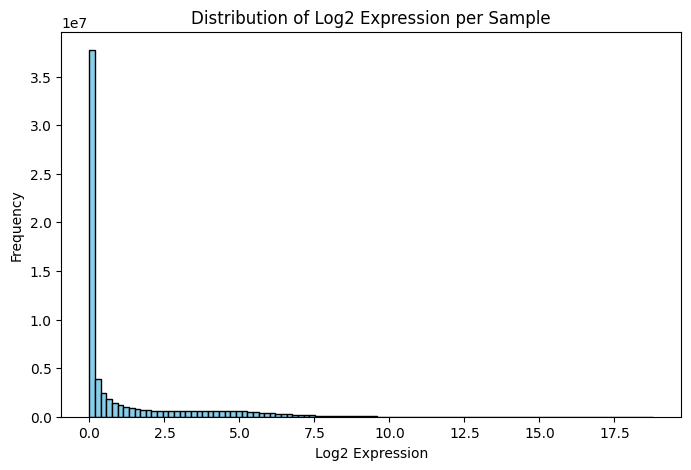

In [12]:
import matplotlib.pyplot as plt

# df_tumor_01: genes x samples

plt.figure(figsize=(12,6))

plt.figure(figsize=(8,5))
plt.hist(df_tumor_01.values.flatten(), bins=100, color='skyblue', edgecolor='black')
plt.xlabel('Log2 Expression')
plt.ylabel('Frequency')
plt.title('Distribution of Log2 Expression per Sample')
plt.show()



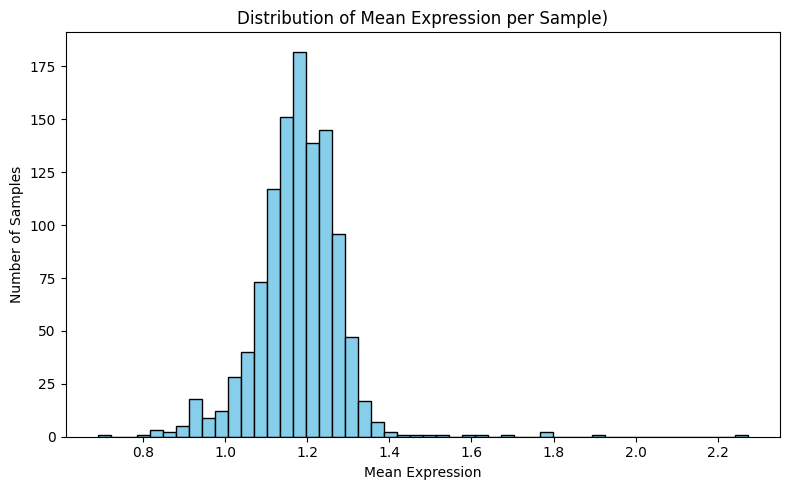

In [13]:
import matplotlib.pyplot as plt

# Compute mean expression per sample (column-wise) without creating a copy
sample_means = df_tumor_01.mean(axis=0)  # returns a Series (samples)

# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(sample_means, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Mean Expression per Sample)')
plt.xlabel('Mean Expression')
plt.ylabel('Number of Samples')
plt.tight_layout()
plt.show()


In [14]:
# Filter genes with low expression across 10 % of samples 
min_samples = int(0.1 * df_tumor_01.shape[1])
df_filtered = df_tumor_01.loc[df_tumor_01.gt(0).sum(axis=1) >= min_samples]
print("After filtering low-expression genes:", df_filtered.shape)


After filtering low-expression genes: (44267, 1106)


In [15]:
variance_threshold = 0.25
high_var_genes = df_filtered.std(axis=1) > variance_threshold
df_high_var = df_filtered.loc[high_var_genes, :]
print("After variance filter:", df_high_var.shape)


After variance filter: (33472, 1106)


In [16]:
#standardize per gene (row wise)
from sklearn.preprocessing import StandardScaler

df_scaled = pd.DataFrame(
    StandardScaler().fit_transform(df_high_var.T).T,
    index=df_high_var.index,
    columns=df_high_var.columns
)

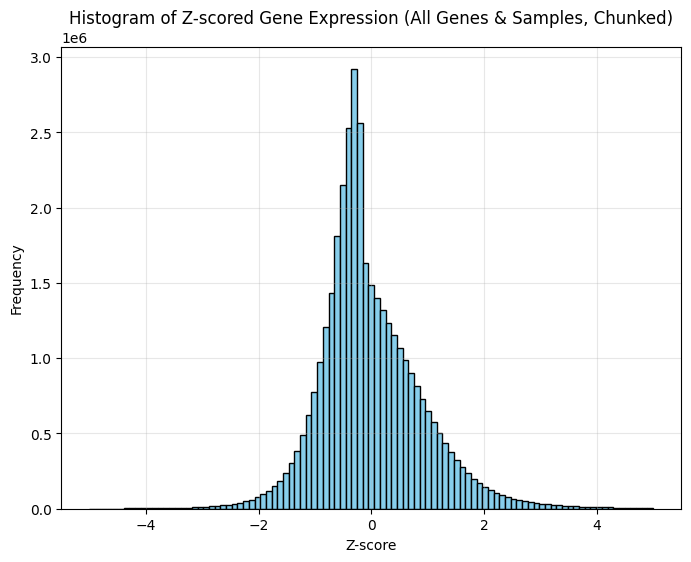

In [17]:
import numpy as np

plt.figure(figsize=(8,6))

# Define bins
bins = np.linspace(-5, 5, 100)  # adjust range to focus on most data

# Incrementally count histogram
hist_counts = np.zeros(len(bins)-1)
for chunk in np.array_split(df_scaled.values, 10, axis=0):  # split by rows (genes)
    counts, _ = np.histogram(chunk, bins=bins)
    hist_counts += counts

plt.bar((bins[:-1]+bins[1:])/2, hist_counts, width=(bins[1]-bins[0]), color='skyblue', edgecolor='black')
plt.title("Histogram of Z-scored Gene Expression (All Genes & Samples, Chunked)")
plt.xlabel("Z-score")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.3)
plt.show()


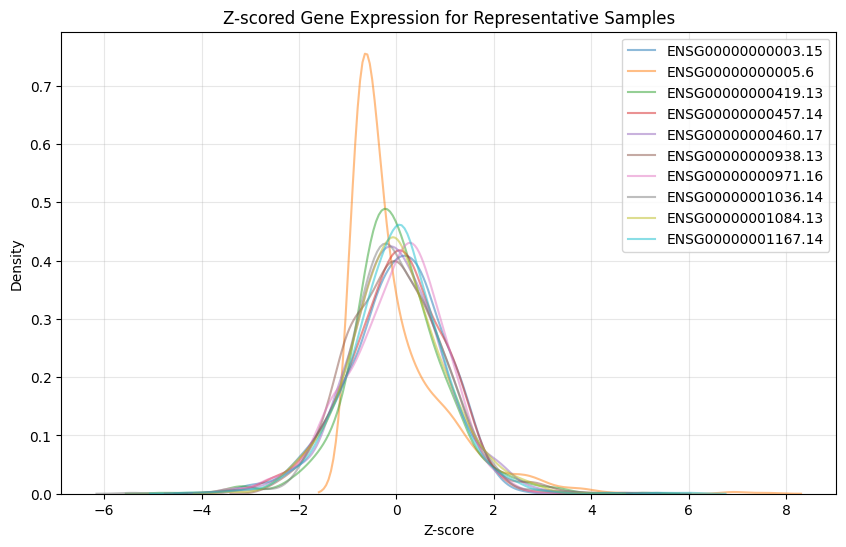

In [18]:
plt.figure(figsize=(10,6))

for sample_id in df_scaled.index[:10]:  # first 10 samples as representative
    sns.kdeplot(df_scaled.loc[sample_id], label=sample_id, fill=False, alpha=0.5)

plt.title("Z-scored Gene Expression for Representative Samples")
plt.xlabel("Z-score")
plt.ylabel("Density")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [19]:
output_path = r"C:\Projects\BRCA_ML_Project\Data\Output\BRCA_Expression_Preprocessed.csv"
print(f"Data successfully saved to: {output_path}")

Data successfully saved to: C:\Projects\BRCA_ML_Project\Data\Output\BRCA_Expression_Preprocessed.csv


##### Molecular Subtyping of Breast Cancer Using PAM50 Gene Expression Profiling

In [20]:
df_pam = pd.read_csv(r"C:\Projects\BRCA_ML_Project\Data\Raw_Data\brca_pam50_cell21.csv")
df_pam.head()

,Sample,Histology Annotations,subtype,Status,er_status_by_ihc,pr_status_by_ihc,HER2.newly.derived,Triple Negative Status,Biological group annotations,Special Comments,Special Comments2
0,TCGA-A1-A0SB-01A,Adenoid cystic carcinoma,normal-like,Tumor,Positive,Negative,Negative,No,-,Other specify,Adenoid Cystic Carcinoma
1,TCGA-A7-A5ZV-01A,Carcinoma with apocrine differentiation,Basal,Tumor,Negative,Negative,Negative,Yes,-,Infiltrating Carcinoma NOS,[Not Applicable]
2,TCGA-AR-A24U-01A,Carcinoma with apocrine differentiation,HER2E,Tumor,Negative,Negative,Positive,No,-,Infiltrating Ductal Carcinoma,[Not Applicable]
3,TCGA-A2-A04W-01A,Carcinoma with apocrine differentiation/ lipid...,HER2E,Tumor,Negative,Negative,Positive,No,-,Other specify,Apocrine
4,TCGA-A2-A0EM-01A,Cribriform carcinoma,LumA,Tumor,Positive,Positive,Negative,No,Cribriform carcinoma,Infiltrating Ductal Carcinoma,[Not Applicable]


In [21]:
df_pam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1198 entries, 0 to 1197
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Sample                        1198 non-null   object
 1   Histology Annotations         1198 non-null   object
 2   subtype                       1198 non-null   object
 3   Status                        1198 non-null   object
 4   er_status_by_ihc              1192 non-null   object
 5   pr_status_by_ihc              1192 non-null   object
 6   HER2.newly.derived            1192 non-null   object
 7   Triple Negative Status        1142 non-null   object
 8   Biological group annotations  1198 non-null   object
 9   Special Comments              1198 non-null   object
 10  Special Comments2             1198 non-null   object
dtypes: object(11)
memory usage: 103.1+ KB


In [22]:
# Set 'Sample' column as the index
df_pam.set_index('Sample', inplace=True)

# Verify the change
print("All columns:", df_pam.columns.tolist())
print("Sample of index values:", df_pam.index[:10].tolist())
print("Data types:")
print(df_pam.dtypes)

All columns: ['Histology Annotations', 'subtype', 'Status', 'er_status_by_ihc', 'pr_status_by_ihc', 'HER2.newly.derived', 'Triple Negative Status', 'Biological group annotations', 'Special Comments', 'Special Comments2']
Sample of index values: ['TCGA-A1-A0SB-01A', 'TCGA-A7-A5ZV-01A', 'TCGA-AR-A24U-01A', 'TCGA-A2-A04W-01A', 'TCGA-A2-A0EM-01A', 'TCGA-C8-A26Z-01A', 'TCGA-E2-A15J-01A', 'TCGA-B6-A0IA-01A', 'TCGA-B6-A0X0-01A', 'TCGA-EW-A2FW-01A']
Data types:
Histology Annotations           object
subtype                         object
Status                          object
er_status_by_ihc                object
pr_status_by_ihc                object
HER2.newly.derived              object
Triple Negative Status          object
Biological group annotations    object
Special Comments                object
Special Comments2               object
dtype: object


In [23]:
pam_df1= df_pam[['Histology Annotations', 'subtype']]
print(pam_df1.head())

                                              Histology Annotations  \
Sample                                                                
TCGA-A1-A0SB-01A                           Adenoid cystic carcinoma   
TCGA-A7-A5ZV-01A            Carcinoma with apocrine differentiation   
TCGA-AR-A24U-01A            Carcinoma with apocrine differentiation   
TCGA-A2-A04W-01A  Carcinoma with apocrine differentiation/ lipid...   
TCGA-A2-A0EM-01A                               Cribriform carcinoma   

                      subtype  
Sample                         
TCGA-A1-A0SB-01A  normal-like  
TCGA-A7-A5ZV-01A        Basal  
TCGA-AR-A24U-01A        HER2E  
TCGA-A2-A04W-01A        HER2E  
TCGA-A2-A0EM-01A         LumA  


In [24]:
pam_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1198 entries, TCGA-A1-A0SB-01A to TCGA-AC-A23E-01A
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Histology Annotations  1198 non-null   object
 1   subtype                1198 non-null   object
dtypes: object(2)
memory usage: 28.1+ KB


In [25]:
#missing values check
pam_df1.isnull().sum()

Histology Annotations    0
subtype                  0
dtype: int64

In [26]:
#uniques values check
counts = pam_df1['subtype'].value_counts(dropna=False)
print(counts)

subtype
LumA           569
LumB           219
Basal          187
True Normal     97
HER2E           82
normal-like     39
CLOW             5
Name: count, dtype: int64


In [27]:
# Combine True Normal and Normal subtypes into a single 'Normal' category
#create a mapping dictionary
subtype_mapping = {
"True Normal": "Normal", # Combine True Normal into Normal
"normal-like": "Normal"
}

In [28]:
pam_df1.loc[:, 'subtype'] = pam_df1['subtype'].replace(subtype_mapping)

In [29]:
df_pam_filtered = pam_df1[pam_df1['subtype'] != 'CLOW']
print(df_pam_filtered['subtype'].value_counts())

subtype
LumA      569
LumB      219
Basal     187
Normal    136
HER2E      82
Name: count, dtype: int64


In [30]:
df_pam_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1193 entries, TCGA-A1-A0SB-01A to TCGA-AC-A23E-01A
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Histology Annotations  1193 non-null   object
 1   subtype                1193 non-null   object
dtypes: object(2)
memory usage: 28.0+ KB


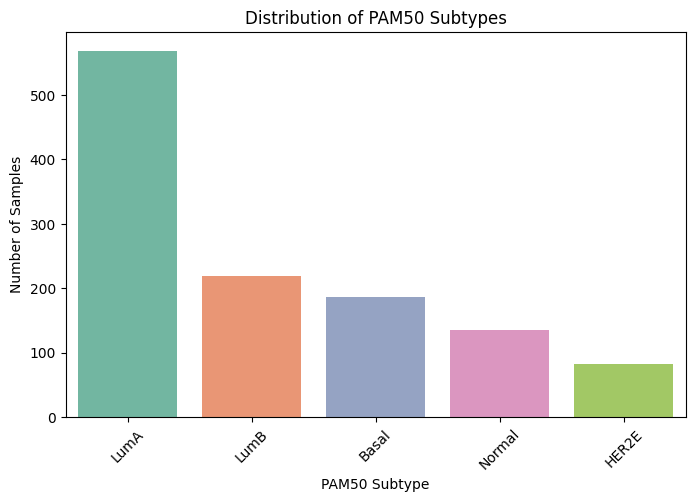

In [31]:
# Plot the distribution of subtype

plt.figure(figsize=(8,5))

sns.countplot(data=df_pam_filtered, x='subtype', order=df_pam_filtered['subtype'].value_counts().index, palette='Set2')

plt.title('Distribution of PAM50 Subtypes')
plt.xlabel('PAM50 Subtype')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.show()

In [32]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

classes = np.unique(df_pam_filtered['subtype'])
weights = compute_class_weight('balanced', classes=classes, y=df_pam_filtered['subtype'])
class_weights = dict(zip(classes, weights))
print(class_weights)


{'Basal': np.float64(1.2759358288770053), 'HER2E': np.float64(2.9097560975609755), 'LumA': np.float64(0.41933216168717047), 'LumB': np.float64(1.089497716894977), 'Normal': np.float64(1.7544117647058823)}


In [33]:
counts = df_pam_filtered['subtype'].value_counts(dropna=False)
print(counts)

subtype
LumA      569
LumB      219
Basal     187
Normal    136
HER2E      82
Name: count, dtype: int64


In [34]:
print("All columns:", df_pam_filtered.columns.tolist())
print("Sample of index values:", df_pam_filtered.index[:10].tolist())
print("Data types:")
print(df_pam_filtered.dtypes)

All columns: ['Histology Annotations', 'subtype']
Sample of index values: ['TCGA-A1-A0SB-01A', 'TCGA-A7-A5ZV-01A', 'TCGA-AR-A24U-01A', 'TCGA-A2-A04W-01A', 'TCGA-A2-A0EM-01A', 'TCGA-C8-A26Z-01A', 'TCGA-E2-A15J-01A', 'TCGA-B6-A0IA-01A', 'TCGA-B6-A0X0-01A', 'TCGA-EW-A2FW-01A']
Data types:
Histology Annotations    object
subtype                  object
dtype: object


In [35]:
#save processed pm50 data
output_path = r"C:\Projects\BRCA_ML_Project\Data\Output\pam50_subtype_final.csv"
print("pm50 subtype mapping saved successfully.")

pm50 subtype mapping saved successfully.


##### Merging TCGA-BRACA RNA-seq with PAM50 Subtypes

In [36]:
#set sample column as index in PAM50 filtered data to merge and align to expression data
print("Sample is already the index - no need to set_index again")

#Transpose scaled expression data from gene x sample → sample x gene
df_scaled_T = df_scaled.T  # samples x genes

Sample is already the index - no need to set_index again


In [37]:
df_scaled_T.head()

Ensembl_ID,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288605.1,ENSG00000288610.1,ENSG00000288611.1,ENSG00000288612.1,ENSG00000288657.1,ENSG00000288658.1,ENSG00000288662.1,ENSG00000288667.1,ENSG00000288670.1,ENSG00000288675.1
TCGA-D8-A146-01A,0.610197,2.328917,0.087625,0.818738,-0.121804,0.447096,0.692038,-0.180770,0.656173,0.377834,...,0.093708,-0.616491,0.089876,-0.255198,-0.192399,-0.402418,-0.299039,-0.277701,-0.352486,0.226766
TCGA-AQ-A0Y5-01A,-1.316444,-0.416462,0.451444,0.310375,-0.680297,-0.939375,0.643819,1.311532,0.185266,0.189404,...,-0.572282,-0.616491,-0.218659,0.419290,-0.192399,1.070073,-0.299039,-0.277701,1.329819,0.476578
TCGA-C8-A274-01A,1.448887,-0.852914,-0.000903,1.744744,1.478272,-1.157919,-1.153787,-0.979507,-0.698249,0.549215,...,-0.519725,-0.366014,-0.352346,-0.987668,-0.192399,0.024076,-0.299039,-0.277701,1.232449,-0.848617
TCGA-BH-A0BD-01A,-0.252735,1.341187,-0.582856,0.781533,1.637925,-0.057384,0.469463,-0.190368,-0.398721,0.141536,...,-0.140576,-0.302118,-0.284359,-0.973500,-0.192399,-0.387086,-0.299039,1.075270,1.215301,-0.989469
TCGA-B6-A1KC-01B,-0.777049,-0.442553,-1.008284,-0.405958,-0.463195,-1.836544,-0.482119,-0.811401,-0.931012,0.538368,...,-0.572282,1.192568,3.955282,-0.819282,-0.192399,1.679397,-0.299039,-0.277701,1.865646,-1.294831


In [38]:
# Merging (RNA seq + subtype)
merged_df = df_scaled_T.merge(df_pam_filtered[['subtype']], left_index=True, right_index=True)
print(merged_df.shape)
print(merged_df['subtype'].value_counts())

(1089, 33473)
subtype
LumA      565
LumB      217
Basal     186
HER2E      82
Normal     39
Name: count, dtype: int64


In [39]:
merged_df.head()

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288610.1,ENSG00000288611.1,ENSG00000288612.1,ENSG00000288657.1,ENSG00000288658.1,ENSG00000288662.1,ENSG00000288667.1,ENSG00000288670.1,ENSG00000288675.1,subtype
TCGA-D8-A146-01A,0.610197,2.328917,0.087625,0.818738,-0.121804,0.447096,0.692038,-0.180770,0.656173,0.377834,...,-0.616491,0.089876,-0.255198,-0.192399,-0.402418,-0.299039,-0.277701,-0.352486,0.226766,LumA
TCGA-AQ-A0Y5-01A,-1.316444,-0.416462,0.451444,0.310375,-0.680297,-0.939375,0.643819,1.311532,0.185266,0.189404,...,-0.616491,-0.218659,0.419290,-0.192399,1.070073,-0.299039,-0.277701,1.329819,0.476578,LumA
TCGA-C8-A274-01A,1.448887,-0.852914,-0.000903,1.744744,1.478272,-1.157919,-1.153787,-0.979507,-0.698249,0.549215,...,-0.366014,-0.352346,-0.987668,-0.192399,0.024076,-0.299039,-0.277701,1.232449,-0.848617,LumB
TCGA-BH-A0BD-01A,-0.252735,1.341187,-0.582856,0.781533,1.637925,-0.057384,0.469463,-0.190368,-0.398721,0.141536,...,-0.302118,-0.284359,-0.973500,-0.192399,-0.387086,-0.299039,1.075270,1.215301,-0.989469,LumB
TCGA-B6-A1KC-01B,-0.777049,-0.442553,-1.008284,-0.405958,-0.463195,-1.836544,-0.482119,-0.811401,-0.931012,0.538368,...,1.192568,3.955282,-0.819282,-0.192399,1.679397,-0.299039,-0.277701,1.865646,-1.294831,LumB


##### PCA Analaysis

In [40]:
# Create Feature Matrix (x) and target vector (y)

X = merged_df.drop(columns=['subtype'])

y = merged_df['subtype']  # for coloring in plots

In [41]:
# First, perform PCA and create the dataframe
from sklearn.decomposition import PCA

# Perform PCA with more components
pca_full = PCA(n_components=4)
X_pca_full = pca_full.fit_transform(X)  # Use your X from earlier

# Create complete PCA dataframe
pca_df_complete = pd.DataFrame(X_pca_full, 
                              columns=['PC1', 'PC2', 'PC3', 'PC4'], 
                              index=X.index)

pca_df_complete['subtype'] = y  # Add subtype labels


print(f"Shape: {pca_df_complete.shape}")
print(f"Variance explained: {pca_full.explained_variance_ratio_}")

Shape: (1089, 5)
Variance explained: [0.11546108 0.06167492 0.04887253 0.04410694]


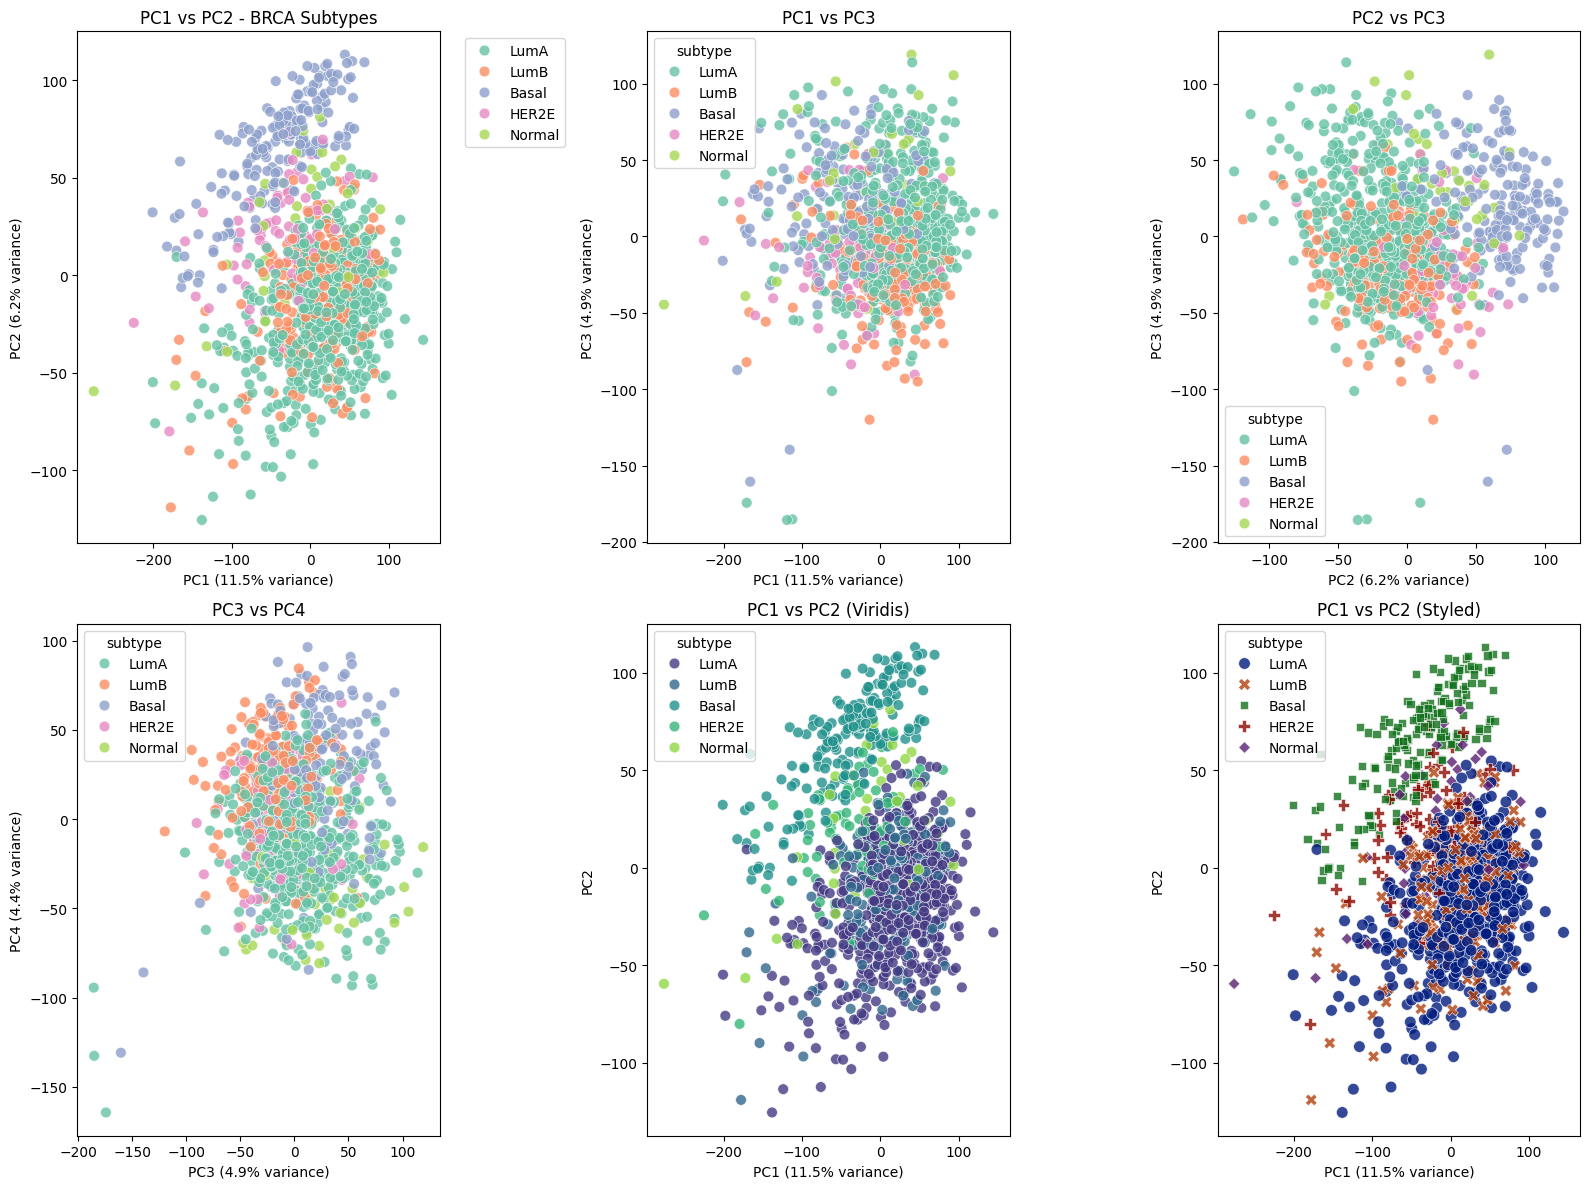

In [42]:
plt.figure(figsize=(16, 12))

# Subplot 1: PC1 vs PC2
plt.subplot(2, 3, 1)
sns.scatterplot(data=pca_df_complete, x='PC1', y='PC2', hue='subtype', 
                palette='Set2', s=60, alpha=0.8, edgecolor='w', linewidth=0.5)
plt.title("PC1 vs PC2 - BRCA Subtypes")
plt.xlabel(f"PC1 ({pca_full.explained_variance_ratio_[0]*100:.1f}% variance)")
plt.ylabel(f"PC2 ({pca_full.explained_variance_ratio_[1]*100:.1f}% variance)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Subplot 2: PC1 vs PC3
plt.subplot(2, 3, 2)
sns.scatterplot(data=pca_df_complete, x='PC1', y='PC3', hue='subtype', 
                palette='Set2', s=60, alpha=0.8, edgecolor='w', linewidth=0.5)
plt.title("PC1 vs PC3")
plt.xlabel(f"PC1 ({pca_full.explained_variance_ratio_[0]*100:.1f}% variance)")
plt.ylabel(f"PC3 ({pca_full.explained_variance_ratio_[2]*100:.1f}% variance)")

# Subplot 3: PC2 vs PC3
plt.subplot(2, 3, 3)
sns.scatterplot(data=pca_df_complete, x='PC2', y='PC3', hue='subtype', 
                palette='Set2', s=60, alpha=0.8, edgecolor='w', linewidth=0.5)
plt.title("PC2 vs PC3")
plt.xlabel(f"PC2 ({pca_full.explained_variance_ratio_[1]*100:.1f}% variance)")
plt.ylabel(f"PC3 ({pca_full.explained_variance_ratio_[2]*100:.1f}% variance)")

# Subplot 4: PC3 vs PC4
plt.subplot(2, 3, 4)
sns.scatterplot(data=pca_df_complete, x='PC3', y='PC4', hue='subtype', 
                palette='Set2', s=60, alpha=0.8, edgecolor='w', linewidth=0.5)
plt.title("PC3 vs PC4")
plt.xlabel(f"PC3 ({pca_full.explained_variance_ratio_[2]*100:.1f}% variance)")
plt.ylabel(f"PC4 ({pca_full.explained_variance_ratio_[3]*100:.1f}% variance)")

# Subplot 5: Different color palette
plt.subplot(2, 3, 5)
sns.scatterplot(data=pca_df_complete, x='PC1', y='PC2', hue='subtype', 
                palette='viridis', s=60, alpha=0.8, edgecolor='w', linewidth=0.5)
plt.title("PC1 vs PC2 (Viridis)")
plt.xlabel(f"PC1 ({pca_full.explained_variance_ratio_[0]*100:.1f}% variance)")

# Subplot 6: With different markers
plt.subplot(2, 3, 6)
sns.scatterplot(data=pca_df_complete, x='PC1', y='PC2', hue='subtype', style='subtype',
                palette='dark', s=70, alpha=0.8, edgecolor='w', linewidth=0.5)
plt.title("PC1 vs PC2 (Styled)")
plt.xlabel(f"PC1 ({pca_full.explained_variance_ratio_[0]*100:.1f}% variance)")

plt.tight_layout()
plt.show()

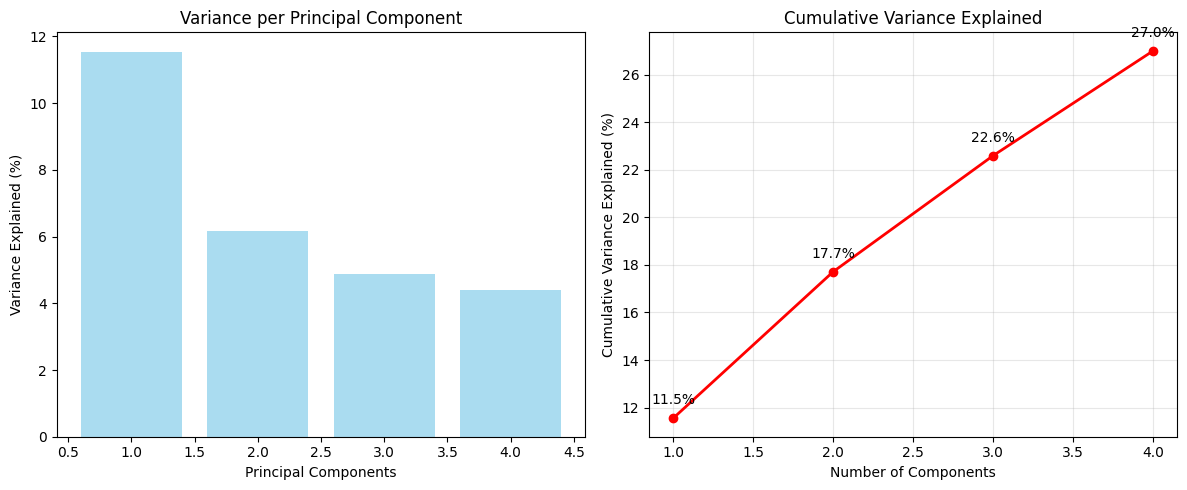

In [43]:
# Scree plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
components = range(1, len(pca_full.explained_variance_ratio_) + 1)
plt.bar(components, pca_full.explained_variance_ratio_ * 100, alpha=0.7, color='skyblue')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained (%)')
plt.title('Variance per Principal Component')

plt.subplot(1, 2, 2)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_) * 100
plt.plot(components, cumulative_variance, 'ro-', linewidth=2, markersize=6)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained (%)')
plt.title('Cumulative Variance Explained')
plt.grid(True, alpha=0.3)

# Add annotations
for i, cv in enumerate(cumulative_variance[:5]):
    plt.annotate(f'{cv:.1f}%', (i+1, cv), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()

##### Ensembl_ID(RNA Seq) annotation using GENCODE annotation file

In [44]:
# GTF file extraction
import gzip
import shutil

input_path = r"C:\Projects\BRCA_ML_Project\Data\Raw_Data\gencode.v38.annotation.gtf.gz"
output_path = r"C:\Projects\BRCA_ML_Project\Data\Raw_Data\gencode.v38.annotation.gtf"

# Decompress the gzipped GTF file
with gzip.open(input_path, "rb") as f_in:
    with open(output_path, "wb") as f_out:
        shutil.copyfileobj(f_in, f_out)

print("Extraction completed:", output_path)

Extraction completed: C:\Projects\BRCA_ML_Project\Data\Raw_Data\gencode.v38.annotation.gtf


In [45]:
#Gene mapping file creation
import pandas as pd

gtf_path = r"C:\Projects\BRCA_ML_Project\Data\Raw_Data\gencode.v38.annotation.gtf"
output_csv = r"C:\Projects\BRCA_ML_Project\Data\Output\gencode_v38_gene_map.csv"

#Parse GTF file to extract gene_id and gene_name

gene_rows = []

with open(gtf_path, "r") as f:
    for line in f:
        if line.startswith("#"):
            continue
        
        fields = line.strip().split("\t")
        feature_type = fields[2]
        
        # Only gene entries
        if feature_type != "gene":
            continue
        
        attributes = fields[8]
        
        gene_id = None
        gene_name = None
        
        for attr in attributes.split(";"):
            attr = attr.strip()
            if attr.startswith("gene_id"):
                gene_id = attr.split('"')[1]
            elif attr.startswith("gene_name"):
                gene_name = attr.split('"')[1]
        
        if gene_id and gene_name:
            gene_rows.append([gene_id.split(".")[0], gene_name])  # Remove version

# Create DataFrame
df_map = pd.DataFrame(gene_rows, columns=["Ensembl_ID", "Gene_Symbol"])

df_map.to_csv(output_csv, index=False)

print("Saved:", output_csv)
df_map.head()


Saved: C:\Projects\BRCA_ML_Project\Data\Output\gencode_v38_gene_map.csv


,Ensembl_ID,Gene_Symbol
0,ENSG00000223972,DDX11L1
1,ENSG00000227232,WASH7P
2,ENSG00000278267,MIR6859-1
3,ENSG00000243485,MIR1302-2HG
4,ENSG00000284332,MIR1302-2


In [46]:
#Load the mapping
df_map = pd.read_csv(r"C:\Projects\BRCA_ML_Project\Data\Output\gencode_v38_gene_map.csv")
print(df_map.columns.tolist())

['Ensembl_ID', 'Gene_Symbol']


In [47]:
#PAM50 Gene Matching
# Define PAM50 genes
pam50_gene_list = [
    'ACTR3B', 'ANLN', 'BAG1', 'BCL2', 'BIRC5', 'BLVRA', 'CCNB1', 'CCNE1', 
    'CDC20', 'CDC6', 'CDCA1', 'CDH3', 'CENPF', 'CEP55', 'CXXC5', 'EGFR', 
    'ERBB2', 'ESR1', 'EXO1', 'FGFR4', 'FOXA1', 'FOXC1', 'GRB7', 
    'GGNBP2', 'KIF2C', 'KRT14', 'KRT17', 'KRT5', 'MAPT', 'MDM2', 'MELK', 
    'MIA', 'MKI67', 'MLPH', 'MMP11', 'MYBL2', 'MYC', 'NAT1', 'NDC80', 
    'NUF2', 'ORC6L', 'PGR', 'PHGDH', 'PTTG1', 'RRM2', 'SFRP1', 'SLC39A6', 
    'TYMS', 'UBE2C', 'UBE2T'
]
# Find PAM50 genes in the annotation mapping
matches = df_map[df_map['Gene_Symbol'].str.upper().isin([g.upper() for g in pam50_gene_list])]
print(matches)

            Ensembl_ID Gene_Symbol
1398   ENSG00000117399       CDC20
1450   ENSG00000142945       KIF2C
2822   ENSG00000092621       PHGDH
3752   ENSG00000143228        NUF2
4408   ENSG00000077152       UBE2T
4722   ENSG00000117724       CENPF
5268   ENSG00000174371        EXO1
5631   ENSG00000171848        RRM2
9535   ENSG00000115648        MLPH
16509  ENSG00000134057       CCNB1
17614  ENSG00000171604       CXXC5
18087  ENSG00000164611       PTTG1
18330  ENSG00000160867       FGFR4
18543  ENSG00000054598       FOXC1
21252  ENSG00000091831        ESR1
22222  ENSG00000011426        ANLN
22334  ENSG00000106605       BLVRA
22515  ENSG00000146648        EGFR
24498  ENSG00000133627      ACTR3B
25024  ENSG00000171428        NAT1
25462  ENSG00000104332       SFRP1
26744  ENSG00000136997         MYC
27508  ENSG00000107262        BAG1
27674  ENSG00000165304        MELK
31003  ENSG00000138180       CEP55
31622  ENSG00000148773       MKI67
34347  ENSG00000082175         PGR
36325  ENSG000001860

In [48]:
#Data verification
# Check current expression data structure
print("First 20 Ensembl IDs in expression data (df_scaled):")

print(df_scaled.index[:20])
# Verifies: Ensembl ID format and prepares for mapping

First 20 Ensembl IDs in expression data (df_scaled):
Index(['ENSG00000000003.15', 'ENSG00000000005.6', 'ENSG00000000419.13',
       'ENSG00000000457.14', 'ENSG00000000460.17', 'ENSG00000000938.13',
       'ENSG00000000971.16', 'ENSG00000001036.14', 'ENSG00000001084.13',
       'ENSG00000001167.14', 'ENSG00000001460.18', 'ENSG00000001461.17',
       'ENSG00000001497.18', 'ENSG00000001561.7', 'ENSG00000001617.12',
       'ENSG00000001626.16', 'ENSG00000001629.10', 'ENSG00000001630.17',
       'ENSG00000001631.16', 'ENSG00000002016.18'],
      dtype='object', name='Ensembl_ID')


In [49]:
# Version removal and mapping dictionary creation
# Remove version numbers from the Ensembl ID of expression data index

df_scaled.index = df_scaled.index.str.split('.').str[0]

# Also remove versions in df_map just in case
df_map['Ensembl_ID_nover'] = df_map['Ensembl_ID'].str.split('.').str[0]

# Create a bidirectional mapping from Gene_Symbol to Ensembl_ID (no version)
gene_map = df_map.set_index('Gene_Symbol')['Ensembl_ID_nover'].to_dict() # Symbol → Ensembl

ensembl_to_symbol = df_map.set_index('Ensembl_ID_nover')['Gene_Symbol'].to_dict()  # Ensembl → Symbol


In [50]:
#PAM50 Gene Filtering
# Find PAM50 genes in mapping or exist in df_map
pam50_genes_in_map = [gene_map[g] for g in pam50_gene_list if g in gene_map]

# Filter expression matrix to PAM50 genes only
df_pam50 = df_scaled.loc[df_scaled.index.intersection(pam50_genes_in_map)]

print(f"{df_pam50.shape[0]} PAM50 genes found in your dataset")
print(df_pam50.index.tolist())

48 PAM50 genes found in your dataset
['ENSG00000011426', 'ENSG00000054598', 'ENSG00000062038', 'ENSG00000077152', 'ENSG00000080986', 'ENSG00000082175', 'ENSG00000089685', 'ENSG00000091831', 'ENSG00000092621', 'ENSG00000094804', 'ENSG00000099953', 'ENSG00000101057', 'ENSG00000104332', 'ENSG00000105173', 'ENSG00000106605', 'ENSG00000107262', 'ENSG00000115648', 'ENSG00000117399', 'ENSG00000117724', 'ENSG00000128422', 'ENSG00000129514', 'ENSG00000133627', 'ENSG00000134057', 'ENSG00000135679', 'ENSG00000136997', 'ENSG00000138180', 'ENSG00000141424', 'ENSG00000141736', 'ENSG00000141738', 'ENSG00000142945', 'ENSG00000143228', 'ENSG00000146648', 'ENSG00000148773', 'ENSG00000160867', 'ENSG00000164611', 'ENSG00000165304', 'ENSG00000171428', 'ENSG00000171604', 'ENSG00000171791', 'ENSG00000171848', 'ENSG00000174371', 'ENSG00000175063', 'ENSG00000176890', 'ENSG00000186081', 'ENSG00000186847', 'ENSG00000186868', 'ENSG00000261857', 'ENSG00000278311']


In [51]:
# Convert Ensembl IDs back to human-readable gene symbols
df_pam50.index = df_pam50.index.map(lambda x: ensembl_to_symbol.get(x, x))

# Verify all genes mapped successfully
unmapped = [x for x in df_pam50.index if x not in pam50_gene_list]
print(f"Unmapped genes: {unmapped}")  #Empty list = perfect mapping!

Unmapped genes: []


In [52]:
# Create reverse mapping from Ensembl_ID (no version) to Gene_Symbol
ensembl_to_symbol = df_map.set_index('Ensembl_ID_nover')['Gene_Symbol'].to_dict()

# Rename index in df_pam50
df_pam50.index = df_pam50.index.map(lambda x: ensembl_to_symbol.get(x, x))

print(df_pam50.index.tolist())


['ANLN', 'FOXC1', 'CDH3', 'UBE2T', 'NDC80', 'PGR', 'BIRC5', 'ESR1', 'PHGDH', 'CDC6', 'MMP11', 'MYBL2', 'SFRP1', 'CCNE1', 'BLVRA', 'BAG1', 'MLPH', 'CDC20', 'CENPF', 'KRT17', 'FOXA1', 'ACTR3B', 'CCNB1', 'MDM2', 'MYC', 'CEP55', 'SLC39A6', 'ERBB2', 'GRB7', 'KIF2C', 'NUF2', 'EGFR', 'MKI67', 'FGFR4', 'PTTG1', 'MELK', 'NAT1', 'CXXC5', 'BCL2', 'RRM2', 'EXO1', 'UBE2C', 'TYMS', 'KRT5', 'KRT14', 'MAPT', 'MIA', 'GGNBP2']


In [53]:
# Example: rename index in df_pam50
df_pam50.index = df_pam50.index.map(lambda x: ensembl_to_symbol.get(x, x))

In [54]:
print(df_pam50.index[:10])  # show first 10 row names


Index(['ANLN', 'FOXC1', 'CDH3', 'UBE2T', 'NDC80', 'PGR', 'BIRC5', 'ESR1',
       'PHGDH', 'CDC6'],
      dtype='object', name='Ensembl_ID')


In [55]:
# PCA Analysis on PAM50 genes only

print(f"Input data: {df_pam50.shape[0]} genes, {df_pam50.shape[1]} samples")

# --- Ensure df_pam50 and df_clinical are aligned ---
common_samples = df_pam50.columns.intersection(df_pam_filtered.index)
df_pam50 = df_pam50[common_samples]

df_clinical = df_pam_filtered[df_pam_filtered.index.isin(common_samples)]

print(f"After alignment: {df_pam50.shape[1]} samples")
print("Subtype distribution:")
print(df_clinical['subtype'].value_counts())


Input data: 48 genes, 1106 samples
After alignment: 1089 samples
Subtype distribution:
subtype
LumA      565
LumB      217
Basal     186
HER2E      82
Normal     39
Name: count, dtype: int64


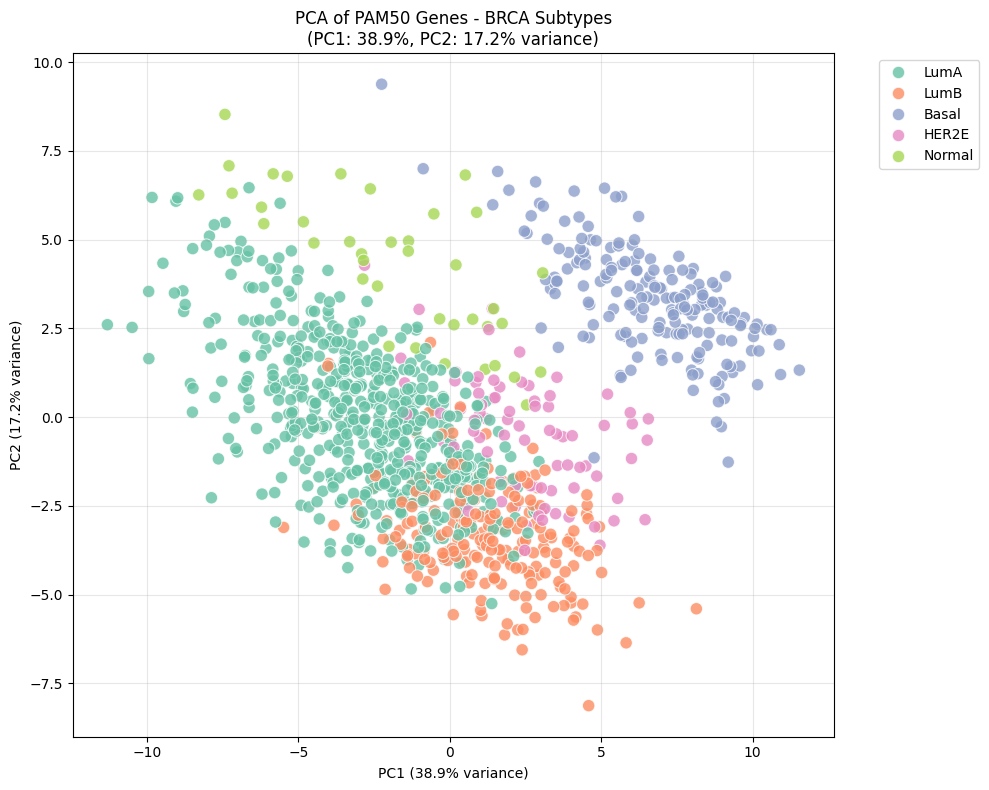

PCA completed! Total variance explained: 56.1%
PCA plot saved to: C:\Projects\BRCA_ML_Project\images\pca_plot.png


In [56]:
# --- PCA ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_pam50.T)  # transpose: samples x genes
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'], index=df_pam50.columns)

# Add subtype information to the PCA dataframe
df_pca['subtype'] = df_clinical['subtype']

# Plot PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='subtype', palette='Set2', s=80, alpha=0.8)

plt.title(f"PCA of PAM50 Genes - BRCA Subtypes\n(PC1: {pca.explained_variance_ratio_[0]:.1%}, PC2: {pca.explained_variance_ratio_[1]:.1%} variance)")
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Save the PCA plot as high-resolution PNG BEFORE showing it
plot_path = r"C:\Projects\BRCA_ML_Project\images\pca_plot.png"
plt.savefig(plot_path, dpi=300, bbox_inches='tight')

# Now show the plot
plt.show()

print(f"PCA completed! Total variance explained: {pca.explained_variance_ratio_.sum():.1%}")
print(f"PCA plot saved to: {plot_path}")

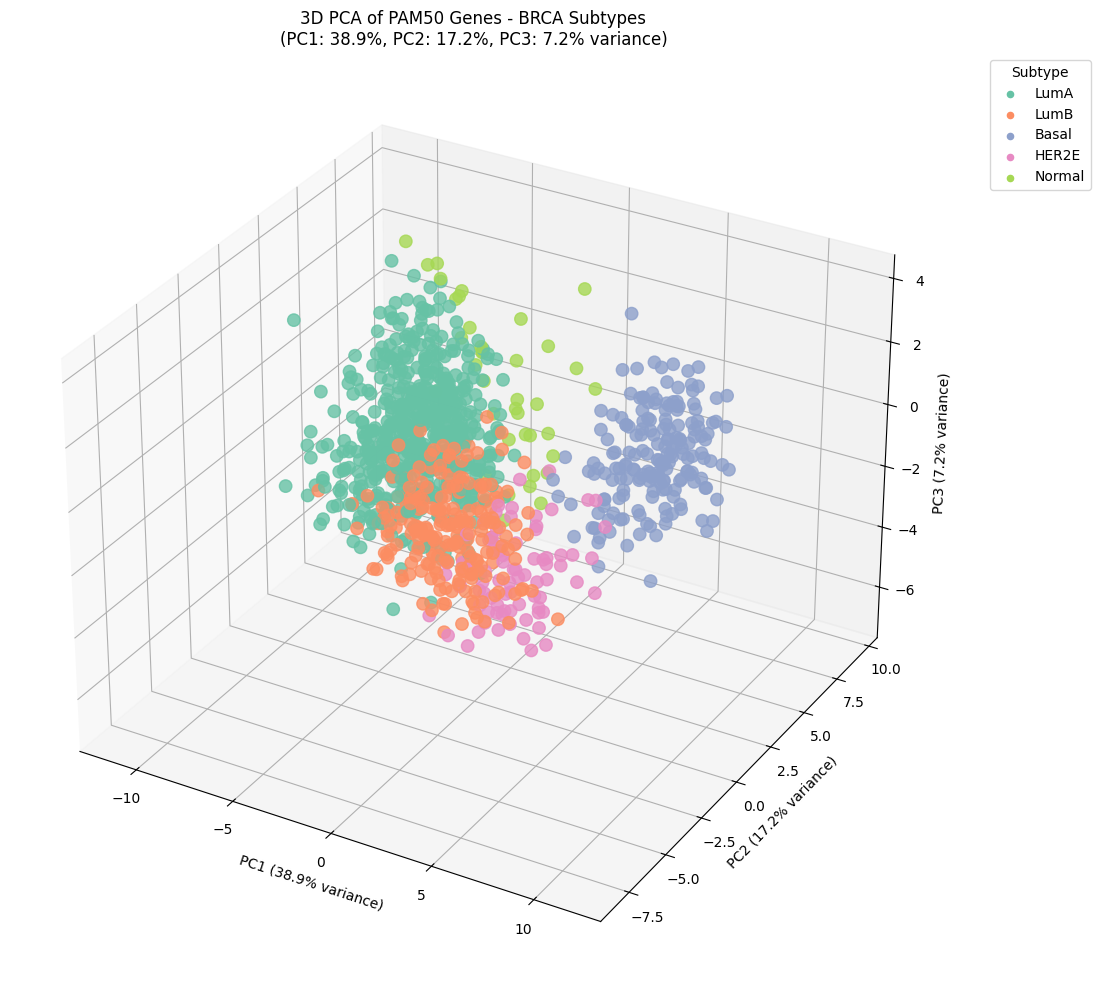

PCA completed! Total variance explained by 3 components: 63.3%
3D PCA plot saved to: C:\Projects\BRCA_ML_Project\images\pca_plot_3d.png


In [ ]:
# 3-D PCA Analysis on PAM50 genes
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import the 3D plotting toolkit
import seaborn as sns
from sklearn.decomposition import PCA

# --- PCA for 3 components ---
pca = PCA(n_components=3)  # CHANGE 1: Use 3 components
X_pca = pca.fit_transform(df_pam50.T)  # transpose: samples x genes
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'], index=df_pam50.columns) # CHANGE 2: Add PC3 column

# Add subtype information to the PCA dataframe
df_pca['subtype'] = df_clinical['subtype']

# --- Plot 3D PCA ---
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d') # CHANGE 3: Create a 3D subplot

# Use seaborn palette to map colors to subtypes consistently
unique_subtypes = df_pca['subtype'].unique()
colors = sns.color_palette('Set2', n_colors=len(unique_subtypes))
color_map = dict(zip(unique_subtypes, colors))
point_colors = df_pca['subtype'].map(color_map)

# Scatter plot in 3D
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=point_colors, s=80, alpha=0.8)

# Set titles and labels
ax.set_title(f"3D PCA of PAM50 Genes - BRCA Subtypes\n(PC1: {pca.explained_variance_ratio_[0]:.1%}, PC2: {pca.explained_variance_ratio_[1]:.1%}, PC3: {pca.explained_variance_ratio_[2]:.1%} variance)")
ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
ax.set_zlabel(f'PC3 ({pca.explained_variance_ratio_[2]:.1%} variance)') # CHANGE 4: Add Z-label

# Create a legend manually because 3D scatter plots don't handle seaborn 'hue' easily
for subtype, color in color_map.items():
    ax.scatter([], [], [], c=[color], label=subtype)
ax.legend(title="Subtype", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout() # Note: tight_layout sometimes behaves oddly with 3D plots

# Save the PCA plot as high-resolution PNG BEFORE showing it
plot_path = r"C:\Projects\BRCA_ML_Project\images\pca_plot_3d.png" # CHANGE 5: Updated filename
# Note: Saving 3D plots might require adjusting view angles before saving for best results
plt.savefig(plot_path, dpi=300, bbox_inches='tight')

# Now show the plot
plt.show()

print(f"PCA completed! Total variance explained by 3 components: {pca.explained_variance_ratio_.sum():.1%}")
print(f"3D PCA plot saved to: {plot_path}")


In [80]:
print("Variance per component:")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {var:.1%}")

print(f"\nCumulative variance:")
print(f"PC1-PC2: {pca.explained_variance_ratio_[:2].sum():.1%}")
print(f"PC1-PC3: {pca.explained_variance_ratio_[:3].sum():.1%}")

Variance per component:
PC1: 38.9%
PC2: 17.2%

Cumulative variance:
PC1-PC2: 56.1%
PC1-PC3: 56.1%


In [81]:
# Which genes contribute most to each PC?
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=df_pam50.index  # Gene names
)

print("Top 10 genes contributing to PC1:")
print(loadings['PC1'].abs().sort_values(ascending=False).head(10))

print("\nTop 10 genes contributing to PC2:")
print(loadings['PC2'].abs().sort_values(ascending=False).head(10))

Top 10 genes contributing to PC1:
Ensembl_ID
KIF2C    0.214299
CDC20    0.210214
CEP55    0.208251
MELK     0.208002
NDC80    0.207016
EXO1     0.203506
MYBL2    0.200763
UBE2C    0.199365
BIRC5    0.197061
CCNE1    0.194631
Name: PC1, dtype: float64

Top 10 genes contributing to PC2:
Ensembl_ID
SFRP1      0.246421
FOXC1      0.232092
KRT17      0.229315
KRT5       0.223062
FOXA1      0.216280
KRT14      0.211498
ESR1       0.208741
CXXC5      0.207961
SLC39A6    0.193369
EGFR       0.190326
Name: PC2, dtype: float64


In [82]:
# Save the PCA coordinates with subtypes
output_path = r"C:\Projects\BRCA_ML_Project\Data\Output\pca_coordinates.csv"
df_pca.to_csv(output_path)
print(f"PCA coordinates saved to: {output_path}")
print(df_pca.head())

PCA coordinates saved to: C:\Projects\BRCA_ML_Project\Data\Output\pca_coordinates.csv
                       PC1       PC2       PC3 subtype
TCGA-D8-A146-01A -3.818388  0.093701  2.148236    LumA
TCGA-AQ-A0Y5-01A -3.432304  0.563453 -2.355925    LumA
TCGA-C8-A274-01A -1.076094 -3.325192 -2.496092    LumB
TCGA-BH-A0BD-01A  2.884863 -1.986403  1.801581    LumB
TCGA-B6-A1KC-01B -2.460646 -1.962156 -1.638970    LumB


In [83]:
# UMAP
import umap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler

# --- Align expression data with subtype annotations ---
common_samples = df_pam50.columns.intersection(df_pam_filtered.index)
df_pam50_aligned = df_pam50[common_samples]
df_subtypes_aligned = df_pam_filtered.loc[common_samples]

print(f"After alignment: {df_pam50_aligned.shape[1]} samples, {df_pam50_aligned.shape[0]} genes")



After alignment: 1089 samples, 48 genes


c:\Projects\BRCA_ML_Project\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


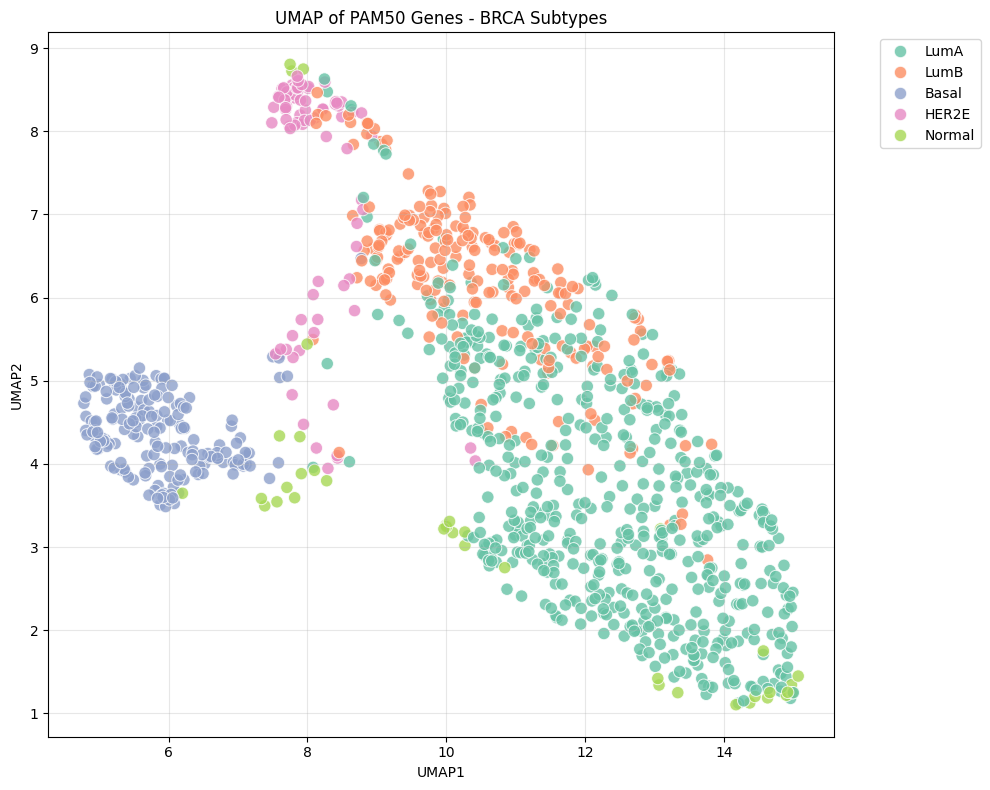

UMAP completed with 1089 samples
Subtype distribution:
subtype
LumA      565
LumB      217
Basal     186
HER2E      82
Normal     39
Name: count, dtype: int64
UMAP plot saved to: C:\Projects\BRCA_ML_Project\Data\Output\umap_plot.png


In [85]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# --- Standardize the data (samples x genes) ---
X = StandardScaler().fit_transform(df_pam50_aligned.T)  # transpose: samples x genes

# --- UMAP ---
reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=15, min_dist=0.1)
X_umap = reducer.fit_transform(X)

# Create UMAP DataFrame
df_umap = pd.DataFrame(X_umap, columns=['UMAP1', 'UMAP2'], index=df_pam50_aligned.columns)

# Add subtype info
df_umap['subtype'] = df_subtypes_aligned['subtype']

# --- Plot UMAP ---
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_umap, x='UMAP1', y='UMAP2', hue='subtype', palette='Set2', s=80, alpha=0.8)
plt.title("UMAP of PAM50 Genes - BRCA Subtypes")
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Save the plot
umap_plot_path = r"C:\Projects\BRCA_ML_Project\Data\Output\umap_plot.png"
plt.savefig(umap_plot_path, dpi=300, bbox_inches='tight')
plt.show()

# Print statistics
print(f"UMAP completed with {len(common_samples)} samples")
print("Subtype distribution:")
print(df_umap['subtype'].value_counts())
print(f"UMAP plot saved to: {umap_plot_path}")

===============================

In [86]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

# Make sure df_pam50 is genes x samples
print(df_pam50.shape)

# Transpose so PCA sees samples as rows, genes as columns
X = df_pam50.T.values  # shape: samples x genes

# Re-fit PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Check that components_ exists
print("PCA components shape:", pca.components_.shape)

# Create loadings DataFrame: genes x PCs
loadings = pd.DataFrame(pca.components_.T,
                        index=df_pam50.index,
                        columns=[f'PC{i+1}' for i in range(pca.n_components_)])

# Get top 50 contributing genes for each PC
top50_PC1 = loadings['PC1'].abs().sort_values(ascending=False).head(50).index.tolist()
top50_PC2 = loadings['PC2'].abs().sort_values(ascending=False).head(50).index.tolist()

# Combined unique list
top50_combined = list(pd.Index(top50_PC1).union(pd.Index(top50_PC2)))

print("Top 50 PC1 genes:", top50_PC1)
print("Top 50 PC2 genes:", top50_PC2)
print("Combined top genes:", top50_combined)

(48, 1089)
PCA components shape: (2, 48)
Top 50 PC1 genes: ['KIF2C', 'CDC20', 'CEP55', 'MELK', 'NDC80', 'EXO1', 'MYBL2', 'UBE2C', 'BIRC5', 'CCNE1', 'ANLN', 'PTTG1', 'MKI67', 'NUF2', 'CENPF', 'RRM2', 'CCNB1', 'UBE2T', 'MLPH', 'TYMS', 'CDC6', 'FOXA1', 'ESR1', 'MAPT', 'PHGDH', 'NAT1', 'FOXC1', 'PGR', 'BCL2', 'CXXC5', 'CDH3', 'SLC39A6', 'ACTR3B', 'MIA', 'EGFR', 'BAG1', 'BLVRA', 'SFRP1', 'MYC', 'KRT5', 'KRT17', 'MDM2', 'FGFR4', 'ERBB2', 'GRB7', 'MMP11', 'GGNBP2', 'KRT14']
Top 50 PC2 genes: ['SFRP1', 'FOXC1', 'KRT17', 'KRT5', 'FOXA1', 'KRT14', 'ESR1', 'CXXC5', 'SLC39A6', 'EGFR', 'CDH3', 'MLPH', 'MDM2', 'MIA', 'GGNBP2', 'CCNB1', 'CDC6', 'BLVRA', 'NAT1', 'RRM2', 'UBE2T', 'MAPT', 'BCL2', 'MKI67', 'PHGDH', 'CENPF', 'PGR', 'TYMS', 'BIRC5', 'CEP55', 'NUF2', 'EXO1', 'ERBB2', 'UBE2C', 'MMP11', 'MELK', 'ACTR3B', 'ANLN', 'PTTG1', 'BAG1', 'NDC80', 'KIF2C', 'MYBL2', 'MYC', 'GRB7', 'CCNE1', 'CDC20', 'FGFR4']
Combined top genes: ['ACTR3B', 'ANLN', 'BAG1', 'BCL2', 'BIRC5', 'BLVRA', 'CCNB1', 'CCNE1', 'CDC20

In [95]:
pd.DataFrame({'gene': top50_combined}).to_csv(
    r"C:\Projects\BRCA_ML_Project\Data\Output\top50_biomarkers.csv", 
    index=False
)
print("Top biomarkers saved to CSV!")


Top biomarkers saved to CSV!


In [96]:
# Subset the original gene expression matrix to top biomarkers
# Subset the original gene expression matrix to top biomarkers
X_ml = df_pam50.loc[top50_combined].T  # transpose: samples x genes

# Labels for ML
y_ml = df_pam_filtered['subtype']  # or binary disease status

print("ML feature matrix shape:", X_ml.shape)
print("Labels shape:", y_ml.shape)


ML feature matrix shape: (1089, 48)
Labels shape: (1193,)


In [97]:
# Find common sample IDs between features and labels
common_samples = X_ml.index.intersection(y_ml.index)

# Subset both to the common samples
X_ml = X_ml.loc[common_samples]
y_ml = y_ml.loc[common_samples]

print("Aligned ML feature matrix shape:", X_ml.shape)
print("Aligned labels shape:", y_ml.shape)

Aligned ML feature matrix shape: (1089, 48)
Aligned labels shape: (1089,)


In [98]:
import pandas as pd

# Save features (samples x top genes)
X_ml.to_csv(r"C:\Projects\BRCA_ML_Project\Data\Output\X_ml_top50.csv", index=True)

# Save labels
y_ml.to_csv(r"C:\Projects\BRCA_ML_Project\Data\Output\y_ml_labels.csv", index=True)

print("Features and labels saved!")

Features and labels saved!
